In [1]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:

data_path = r"E:\FCAI - HU\LEVEL 3\2ND TERM\Selected 2\project\Dataset_BUSI_with_GT"
img_size = 128
counter = 0
X = []
Y = []
categories = os.listdir(data_path)
 
for category in categories:                                                            # this loop to know how many images in categories
    folder_path = os.path.join(data_path,category)                                       # make folder empty has the same path for dataset
    img_names = os.listdir(folder_path)                                                  # put each image in this folder
 
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        fullpath = os.path.join(data_path,category,img_name)
        try:
            img = cv2.imread(fullpath, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # convert to grayscale
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # convert back to 3 channels
            X.append(img)
            Y.append(category)
            counter += 1
            print("Reprocessing Image Number: ", counter)
        except:
            print("Error in ==> ", counter)
 
imgs = np.array(X)/255
lbls = np.array(Y)

Reprocessing Image Number:  1
Reprocessing Image Number:  2
Reprocessing Image Number:  3
Reprocessing Image Number:  4
Reprocessing Image Number:  5
Reprocessing Image Number:  6
Reprocessing Image Number:  7
Reprocessing Image Number:  8
Reprocessing Image Number:  9
Reprocessing Image Number:  10
Reprocessing Image Number:  11
Reprocessing Image Number:  12
Reprocessing Image Number:  13
Reprocessing Image Number:  14
Reprocessing Image Number:  15
Reprocessing Image Number:  16
Reprocessing Image Number:  17
Reprocessing Image Number:  18
Reprocessing Image Number:  19
Reprocessing Image Number:  20
Reprocessing Image Number:  21
Reprocessing Image Number:  22
Reprocessing Image Number:  23
Reprocessing Image Number:  24
Reprocessing Image Number:  25
Reprocessing Image Number:  26
Reprocessing Image Number:  27
Reprocessing Image Number:  28
Reprocessing Image Number:  29
Reprocessing Image Number:  30
Reprocessing Image Number:  31
Reprocessing Image Number:  32
Reprocessing Imag

In [3]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)
#Train and Test Split
train_x, test_x, train_y, test_y = train_test_split(imgs, lbls_encoded, test_size=0.4, stratify=lbls_encoded)
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.5, stratify=test_y)

In [4]:
#Image Data Augmentation
#test_generator = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, width_shift_range=0.2 ,horizontal_flip=True, zoom_range=0.1)
#test_generator.fit(test_x)


# Define the augmentation parameters
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

# Fit the augmentation parameters to the training and validation data
train_generator.fit(train_x)
val_generator.fit(val_x)


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

# Define hyperparameters
learning_rate = 0.0001
batch_size = 32
num_models = 3
epochs = 150

# Define the model architecture
def build_model():
    model = Sequential([    
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(96, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model



models = []
histories = []  # to store the training histories of each model
for i in range(num_models):
    # Create and compile model
    model = build_model()
    # Train model
    history = model.fit(train_generator.flow(train_x, train_y, batch_size=batch_size, shuffle=True), 
                        epochs=epochs, 
                        steps_per_epoch=train_x.shape[0] // batch_size,
                        validation_data=val_generator.flow(val_x, val_y, batch_size=batch_size, shuffle=True),
                        validation_steps=val_x.shape[0] // batch_size)
    # Add model and history to lists
    models.append(model)
    histories.append(history)

# Generate predictions
predictions = []
for model in models:
    pred = model.predict(test_x)
    predictions.append(pred)

# Combine predictions using averaging
final_pred = np.mean(predictions, axis=0)

# Evaluate the final prediction
accuracy = np.mean(np.argmax(final_pred, axis=1) == test_y)
print('Accuracy:', accuracy)


Epoch 1/150
94/94 [==============================] - 28s 288ms/step - loss: 0.8795 - accuracy: 0.5464 - val_loss: 0.7326 - val_accuracy: 0.6200
Epoch 2/150
94/94 [==============================] - 27s 284ms/step - loss: 0.7381 - accuracy: 0.6250 - val_loss: 0.6901 - val_accuracy: 0.6583
Epoch 3/150
94/94 [==============================] - 25s 270ms/step - loss: 0.6841 - accuracy: 0.6579 - val_loss: 0.6643 - val_accuracy: 0.6633
Epoch 4/150
94/94 [==============================] - 30s 314ms/step - loss: 0.6493 - accuracy: 0.6988 - val_loss: 0.6030 - val_accuracy: 0.7248
Epoch 5/150
94/94 [==============================] - 29s 303ms/step - loss: 0.6136 - accuracy: 0.7218 - val_loss: 0.6125 - val_accuracy: 0.7137
Epoch 6/150
94/94 [==============================] - 26s 270ms/step - loss: 0.5835 - accuracy: 0.7494 - val_loss: 0.5614 - val_accuracy: 0.7429
Epoch 7/150
94/94 [==============================] - 26s 277ms/step - loss: 0.5169 - accuracy: 0.7807 - val_loss: 0.5776 - val_accuracy:

In [7]:
model.save('model.h5')


In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score
# Generate predictions
predictions = []
for model in models:
    pred = model.predict(test_x)
    predictions.append(pred)

# Combine predictions using averaging
final_pred = np.mean(predictions, axis=0)

# Get the predicted class for each sample
predicted_classes = np.argmax(final_pred, axis=1)

# Calculate and print F1 score
f1 = f1_score(test_y, predicted_classes, average='macro')
print('F1 Score:', f1)
confusion = confusion_matrix(test_y, np.argmax(final_pred, axis=1))

# Calculate and print other accuracies
accuracy = accuracy_score(test_y, predicted_classes)
precision = precision_score(test_y, predicted_classes, average='macro')
recall = recall_score(test_y, predicted_classes, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion matrix:\n', confusion)

avg_loss = np.mean([model.evaluate(test_x, test_y)[0] for model in models])
print('Average loss:', avg_loss)

32/32 [==============================] - 2s 62ms/step
F1 Score: 0.9855431762294384
Accuracy: 0.9851924975320829
Precision: 0.9854258308895405
Recall: 0.9857173334219939
Confusion matrix:
 [[347   9   1]
 [  5 332   0]
 [  0   0 319]]
32/32 [==============================] - 2s 58ms/step - loss: 0.0713 - accuracy: 0.9852
Average loss: 0.09040388216574986


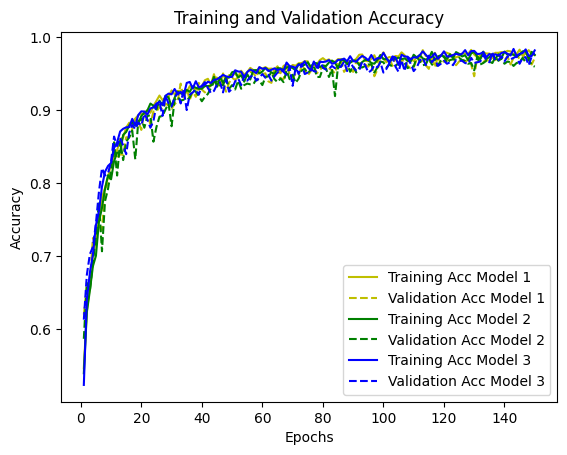

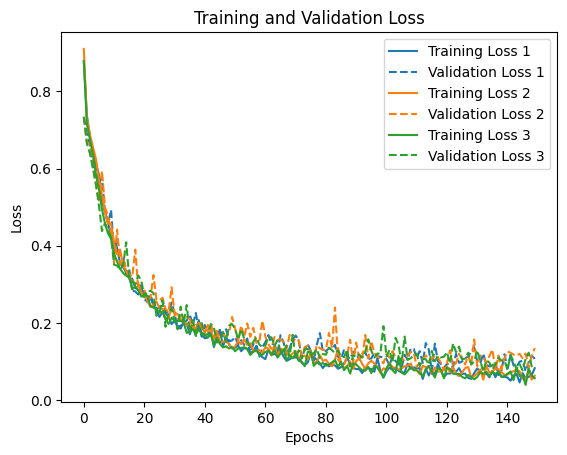

In [9]:
import matplotlib.pyplot as plt
colors = ['y', 'g', 'b']  # define colors for each model

# Plot the training and validation accuracy curves for each model
for i, history in enumerate(histories):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, color=colors[i], label=f'Training Acc Model {i+1}')
    plt.plot(epochs, val_acc, color=colors[i], linestyle='--', label=f'Validation Acc Model {i+1}')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], color=f'C{i}', label=f'Training Loss {i+1}')
    plt.plot(history.history['val_loss'], color=f'C{i}', linestyle='dashed', label=f'Validation Loss {i+1}')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


32/32 [==============================] - 2s 49ms/step


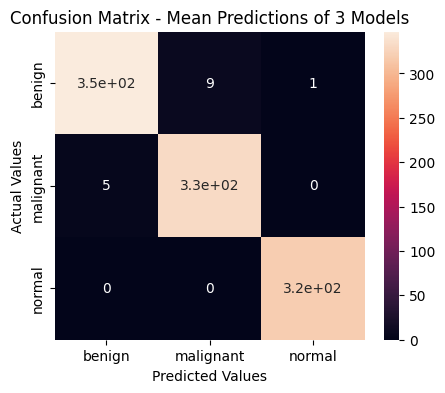

In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical

# Generate predictions from all 3 models
predictions = []
for model in models:
    pred = model.predict(test_x)
    predictions.append(pred)

# Calculate mean predictions across all 3 models
mean_pred = np.mean(predictions, axis=0)
mean_pred = np.argmax(mean_pred, axis=1)

# Convert test_y to categorical
test_y = to_categorical(test_y)
test_y = np.argmax(test_y, axis=1)

# Calculate confusion matrix for mean predictions
cm = confusion_matrix(test_y, mean_pred)
cm_df = pd.DataFrame(cm,
                     index = ['benign','malignant','normal'], 
                     columns = ['benign','malignant','normal'])

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix - Mean Predictions of 3 Models')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


32/32 [==============================] - 2s 49ms/step


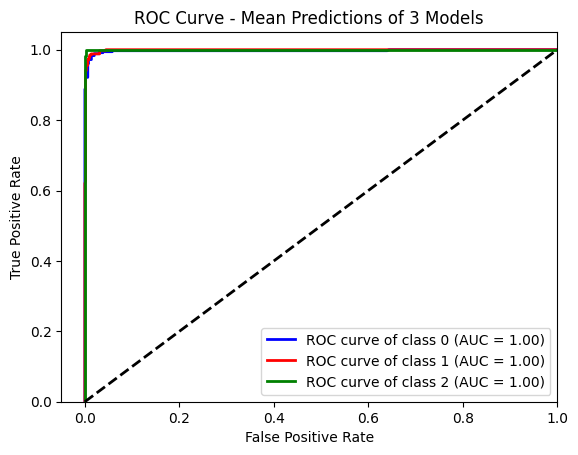

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions from all 3 models
predictions = []
for model in models:
    pred = model.predict(test_x)
    predictions.append(pred)

# Calculate mean predictions across all 3 models
mean_pred = np.mean(predictions, axis=0)

# Calculate mean prediction probabilities for each class
mean_pred_prob = mean_pred / np.sum(mean_pred, axis=1, keepdims=True)

# Convert test_y to one-hot encoded format
test_y_onehot = to_categorical(test_y)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_y_onehot[:, i], mean_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
lw = 2
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Mean Predictions of 3 Models')
plt.legend(loc="lower right")
plt.show()


In [12]:
#GUI_imp
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
 
root = tk.Tk()
root.geometry("1500x1050")  # Size of the window 
root.resizable(width=False, height=False)
root.title('Object Detector')
root['background']='#222227' 
my_font1=('times', 18, 'bold')
my_font2=('times', 12, 'bold')
label = tk.Label(root,text='Upload Files & Detect',width=30,font=my_font1)
label.grid(row=1,column=1)
label.place(anchor = CENTER, relx = .5, rely = .025)
 
 
b1 = tk.Button(root, text='Upload Images', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1,pady=5)
b1.place(anchor = CENTER, relx = .5, rely = .1)
def upload_file():
    f_types = [('Jpg Files', '*.jpg'),
    ('PNG Files','*.png'),('Jpeg Files', '*.jpeg')]   # types of files to select 
    filename = tk.filedialog.askopenfilename(multiple=True,filetypes=f_types)
    col=1 # start from column 1
    row=3 # start from row 3 
    for pathgui in filename:
        img=Image.open(pathgui)# read the image file
        list_of_images = []
        img_preprocessed = cv2.imread(pathgui, cv2.IMREAD_COLOR)
        img_preprocessed = cv2.resize(img_preprocessed, (img_size,img_size))
        img_preprocessed = cv2.cvtColor(img_preprocessed, cv2.COLOR_RGB2BGR)
        list_of_images.append(img_preprocessed)
        arr = np.array(list_of_images)

        prediction_input = model.predict(arr).argmax() #edited
        prediction_input_Normal = le.inverse_transform([prediction_input]) #edited
        img=img.resize((144,144)) # new width & height
        img=ImageTk.PhotoImage(img)
        e1 =tk.Label(root)
        e1.grid(row=row,column=col,pady=100,padx=10)
        e1.image = img
        text_answer=prediction_input_Normal[0] #edited
        # text_answer=text_answer.tolist()
        l2 = tk.Label(root,text=text_answer,width=20,font=my_font2)  
        l2.grid(row=row+1,column=col,pady=0,padx=10)
        e1['image']=img # garbage collection
        if(col==7): # start new line after third column
            row=row+2# start wtih next row
            col=1    # start with first column
        else:       # within the same row 
            col=col+1 # increase to next column      
                                                                          
root.mainloop()  # Keep the window open# your code goes here


1/1 [==============================] - 0s 20ms/step
